# Coeficiente de correlación
### Probabilidad 2
### Grupo 9043
#### Por: Jorge Iván Reyes Hernández

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Dados dos conjuntos de datos $\mathcal{X} = \{ x_1, \dots , x_n\}$ e $\mathcal{Y} = \{y_1 , \dots, y_n\}$, ¿cómo calcular su correlación?.

Supongamos que los datos son generados por dos variables aleatorias, $X$ e $Y$ de tal manera que $\mathcal{X}$ e $\mathcal{Y}$ son muestras aleatorias de algunas distribuciones $F_X$ y $F_Y$.

Dadas esas suposiciones podemos calcular la esperanza y varianza muestral. 

Para fijar ideas considere los siguientes datos

In [2]:
x = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
y = [-6.06, -3.34, -3.33, -4.46, -2.60, -2.23, -0.76, 4.15, 5.33, 3.83, 4.97]

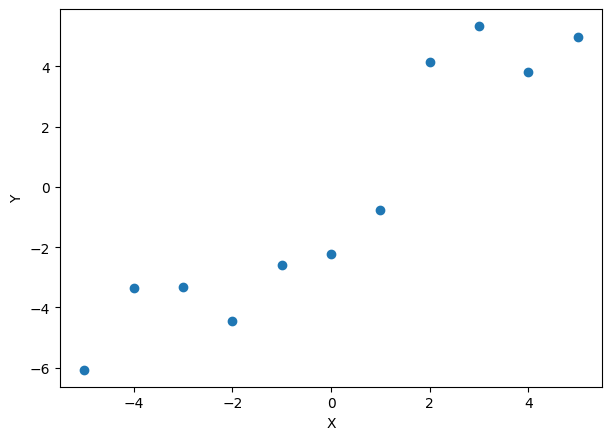

In [3]:
plt.figure(figsize=(7, 5), dpi=100)
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Podemos considerar que los datos anteriores son muestras aleatorias de dos variables aleatorias, de tal forma que podemos calcular su esperanza y varianza (muestral) de la siguiente forma:
$$
\bar{x} = \frac{1}{n} \sum _{i=1}^{n} x_i
$$

$$
S^2 = \frac{1}{n} \sum _{i=1}^{n} (x_i - \bar{x})^2
$$

Para calcular esto en Python podemos usar las funciones
    
    np.mean()
y

    np.var()

que forman parte del paquete numpy.

In [4]:
expectation_x = np.mean(x)
variance_x = np.var(x)

print(f'Esperanza de X: {expectation_x:.2f}')
print(f'Varianza de X: {variance_x:.2f}')

Esperanza de X: 0.00
Varianza de X: 10.00


In [5]:
expectation_y = np.mean(y)
variance_y = np.var(y)

print(f'Esperanza de Y: {expectation_y:.2f}')
print(f'Varianza de Y: {variance_y:.2f}')

Esperanza de Y: -0.41
Varianza de Y: 15.85


También podemos hacerlo a pie, por ejemplo:

In [6]:
var_y = 1 / (len(y)) * np.sum((y - expectation_y) ** 2)
print(var_y)

15.84822644628099


Como ya sabemos cómo calcular esperanzas y varianzas, ya podemos calcular la covarianza

$$
Cov(X, Y) = \mathbb{E}((X- \mathbb{E}(X)) (Y - \mathbb{E}(Y)))
$$

In [7]:
cov_x_y = np.mean((x - expectation_x) * (y - expectation_y))

print(f'Cov(X,Y) = {cov_x_y:.2f}')

Cov(X,Y) = 11.72


De esta manera, podemos conocer el coeficiente de correlación entre $X$ e $Y$

$$
\rho (X, Y) = \frac{Cov(X,Y)}{\sqrt{Var(X) Var(Y)}}
$$

In [8]:
rho_x_y = cov_x_y / np.sqrt(variance_x * variance_y)

print(f'Coeficiente de correlación entre X e Y: {rho_x_y:.2f}')

Coeficiente de correlación entre X e Y: 0.93


Ahora vamos a simular diversos datos y a calcular su coeficiente de correlación.

Coeficiente de correlación -1.00
Matriz de coeficientes de correlación:
[[ 1. -1.]
 [-1.  1.]]


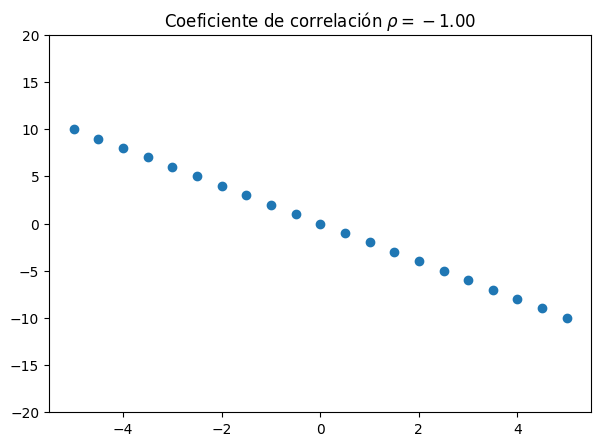

Coeficiente de correlación -0.97
Matriz de coeficientes de correlación:
[[ 1.         -0.96630158]
 [-0.96630158  1.        ]]


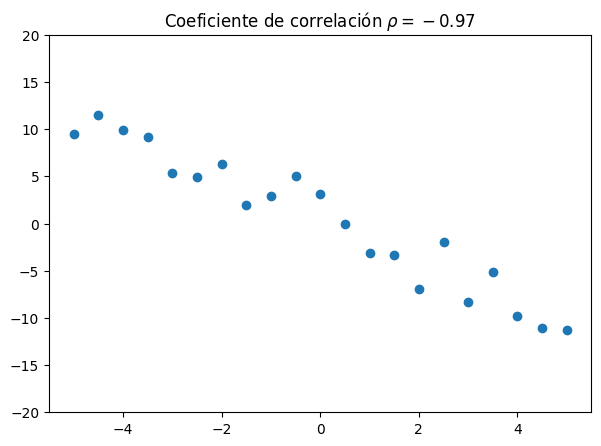

Coeficiente de correlación -0.90
Matriz de coeficientes de correlación:
[[ 1.         -0.89841822]
 [-0.89841822  1.        ]]


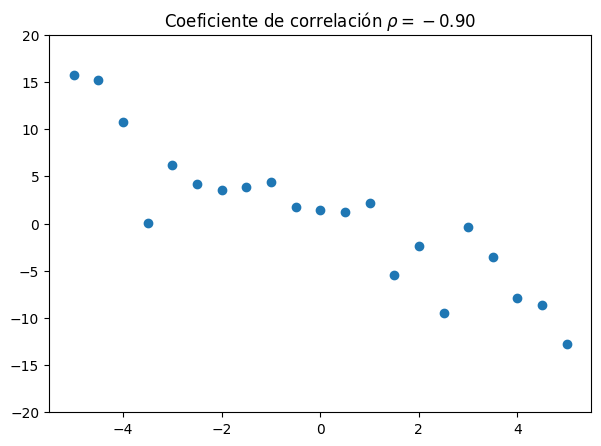

Coeficiente de correlación -0.47
Matriz de coeficientes de correlación:
[[ 1.         -0.47482856]
 [-0.47482856  1.        ]]


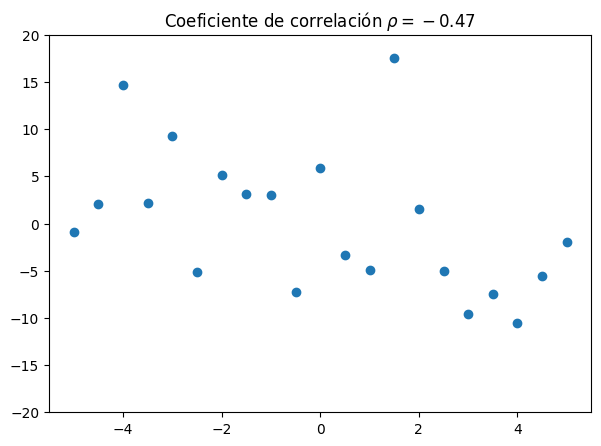

Coeficiente de correlación -0.55
Matriz de coeficientes de correlación:
[[ 1.         -0.55233559]
 [-0.55233559  1.        ]]


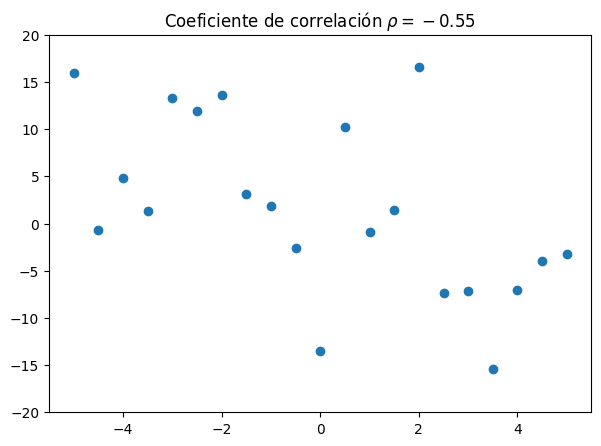

Coeficiente de correlación 0.59
Matriz de coeficientes de correlación:
[[1.         0.59152048]
 [0.59152048 1.        ]]


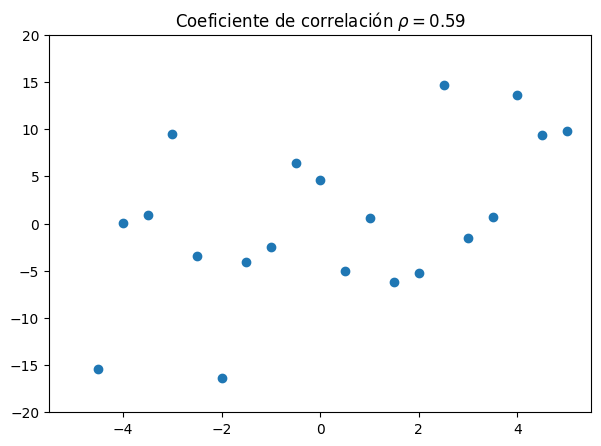

Coeficiente de correlación 0.87
Matriz de coeficientes de correlación:
[[1.         0.86862103]
 [0.86862103 1.        ]]


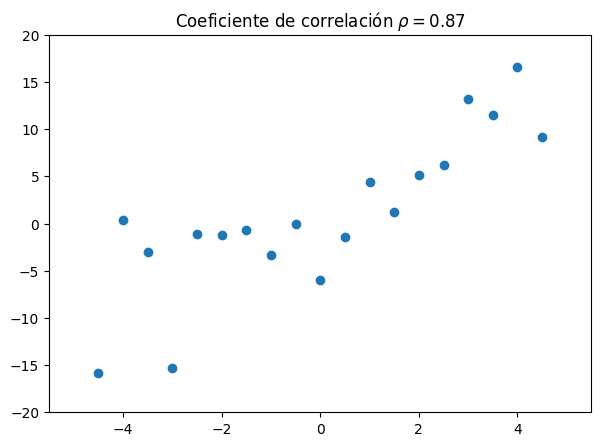

Coeficiente de correlación 0.87
Matriz de coeficientes de correlación:
[[1.         0.86610482]
 [0.86610482 1.        ]]


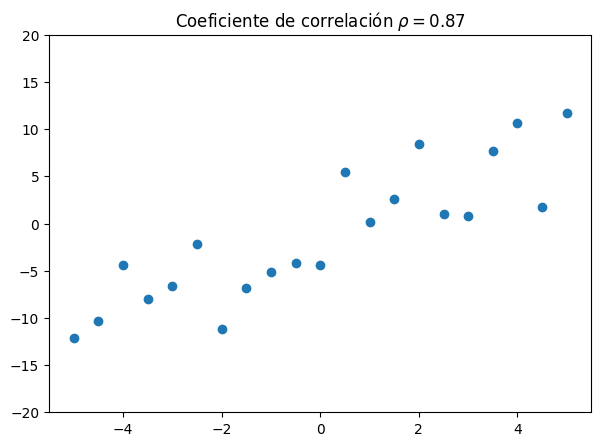

Coeficiente de correlación 0.96
Matriz de coeficientes de correlación:
[[1.         0.96000993]
 [0.96000993 1.        ]]


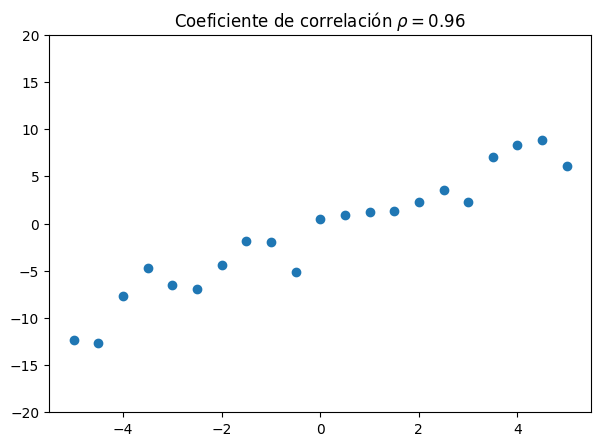

Coeficiente de correlación 1.00
Matriz de coeficientes de correlación:
[[1. 1.]
 [1. 1.]]


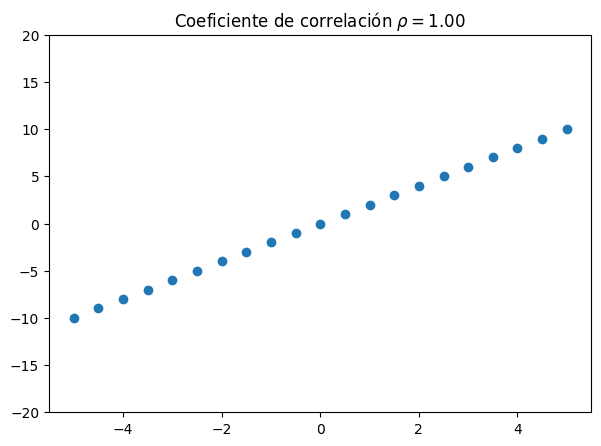

In [9]:
x = np.arange(-5, 5.5, 0.5)  # valores de X fijos
m_list = [-2 , 2]  # valores de la pendiente
sd_list = [0, 2, 4, 6, 8]  # valores de la desviación estándar para el ruido

for m in m_list:
    if m == 2:
        sd_list.reverse()
    for sd in sd_list:
        # Y = mX + b con b una variable aleatoria normal (ruido/error normalmente distribuido)
        y = m * x + np.random.normal(loc=0, scale=sd, size=len(x))
        
        # Calculamos la correlación a pie
        mu_x = np.mean(x)
        mu_y = np.mean(y)
        cov = np.mean((x - mu_x) * (y - mu_y))
        rho = cov / (np.sqrt(np.var(x) * np.var(y)))
        print(f'Coeficiente de correlación {rho:.2f}')
        
        # Usando la matriz de coeficientes de correlación
        corr_matrix = np.corrcoef(x, y)
        
        print(f'Matriz de coeficientes de correlación:')
        print(corr_matrix)
        
        # Graficamos
        plt.figure(figsize=(7, 5), dpi=100)
        plt.scatter(x, y)
        plt.ylim([-20, 20])
        plt.title(r'Coeficiente de correlación $\rho = {:.2f}$'.format(rho))
        plt.show()